## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [1]:
import json

import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1: 
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

100%|██████████| 9.91M/9.91M [00:12<00:00, 766kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 212kB/s]
100%|██████████| 1.65M/1.65M [00:02<00:00, 815kB/s] 
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.57MB/s]


Text(0.5, 1.0, 'Image label: 1')

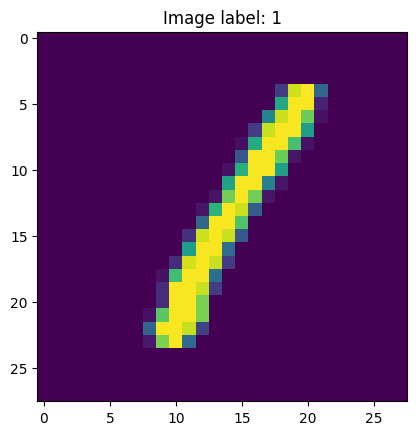

In [2]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [21]:
class SomeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 392),
            nn.ReLU(),
            nn.Linear(392, 196),
            nn.ReLU(),
            nn.Linear(196, 10)
        )

    def forward(self, x):
        logits = self.model(x)
        return logits


model = SomeNet()

Локальные тесты для проверки вашей модели доступны ниже:

In [22]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)    
except Exception as e:
    print('Something is wrong with the model')
    raise e
    
    
assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

In [40]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        pred = model(X.reshape(-1, 784))
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * 32 + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.reshape(-1, 784))
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")



learning_rate = 1e-3

lfn = nn.CrossEntropyLoss()
optim = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_data_loader, model, lfn, optim)
    test_loop(test_data_loader, model, lfn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.052086  [   32/60000]
loss: 0.433884  [ 3232/60000]
loss: 0.356380  [ 6432/60000]
loss: 0.141056  [ 9632/60000]
loss: 0.477433  [12832/60000]
loss: 0.469815  [16032/60000]
loss: 0.212249  [19232/60000]
loss: 0.817154  [22432/60000]
loss: 0.588426  [25632/60000]
loss: 0.554062  [28832/60000]
loss: 0.160309  [32032/60000]
loss: 0.145993  [35232/60000]
loss: 0.194331  [38432/60000]
loss: 0.507368  [41632/60000]
loss: 0.138351  [44832/60000]
loss: 0.196249  [48032/60000]
loss: 0.518435  [51232/60000]
loss: 0.108088  [54432/60000]
loss: 0.229942  [57632/60000]
Test Error: 
 Accuracy: 91.5%, Avg loss: 0.292127 

Epoch 2
-------------------------------
loss: 0.493173  [   32/60000]
loss: 0.337595  [ 3232/60000]
loss: 0.548337  [ 6432/60000]
loss: 0.430503  [ 9632/60000]
loss: 0.381133  [12832/60000]
loss: 0.272339  [16032/60000]
loss: 0.323367  [19232/60000]
loss: 0.186631  [22432/60000]
loss: 0.357175  [25632/60000]
loss: 0.457204  [28832/60000

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [41]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [42]:
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.92525


In [43]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()

In [44]:
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9272


Проверка, что необходимые пороги пройдены:

In [45]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [ ]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy

In [50]:
# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):
    
    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))
    
    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy(),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test'])).numpy()
}

np.save('submission_dict_hw07.npy', submission_dict, allow_pickle=True)
print('File saved to `submission_dict_hw07.npy`')
# __________end of block__________

{'train': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 784), dtype=float32), 'test': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(1000, 784), dtype=float32)}
{'train': array([0, 9, 0, 2, 8, 5, 9, 9, 4, 4, 0, 5, 7, 7, 0, 2, 4, 3, 5, 6, 7, 1,
       4, 5, 5, 7, 7, 2, 2, 2, 7, 2, 0, 1, 8, 6, 9, 6, 9, 6, 9, 8, 0, 4,
       4, 1, 9, 4, 9, 0, 3, 7, 7, 6, 1, 1, 3, 4, 0, 0, 3, 8, 0, 3, 1, 7,
       2, 5, 3, 5, 4, 2, 3, 4, 0, 1, 2, 1, 3, 2, 0, 8, 1, 7, 0, 0, 4, 5,
       0, 3, 1, 8, 4, 8, 2, 5, 9, 2, 9, 6, 3, 1, 5, 4, 3, 7, 0, 8, 6, 5,
       8, 6, 2, 4, 4, 8, 1, 5, 3, 6, 0, 6, 6, 8, 9, 9, 

In [60]:
np.load('submission_dict_hw07_01.npy', allow_pickle=True)

UnpicklingError: Failed to interpret file 'submission_dict_hw07_01.npy' as a pickle

In [68]:
get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy().dtype

dtype('int64')

На этом задание завершено. Поздравляем!